In [1]:
# load metafiles to have a clear overview of where each final genome came from
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import matplotlib.cm as cm
import seaborn as sns
from matplotlib import gridspec
import matplotlib.animation as manimation
import matplotlib.patches as patches
import time
from collections import Counter
import sklearn.cluster as cluster
import time
import hdbscan
from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap
import re
from os import listdir
from os.path import isfile, join

import HTSeq
from Bio import SeqIO

font = {'family' : 'DejaVu Sans',
        'weight' : 'regular',
        'size'   : 16}

plt.rc('font', **font)
plt.rc('lines',lw=2) 
sns.set(font_scale = 2)

In [2]:
lookup = pd.read_pickle('MAGs/Obsidian_MAG_LUT')

In [12]:
lookup['Nearest neighbor ID'].unique()


array(['IMG637000010', 'IMG650716098', 'UBA4801', 'ND', 'IMG2739367758',
       'IMG2718217667', 'IMG2721755438', 'IMG2524614637', 'IMG2718217671',
       'IMG2718217646', 'IMG2721755890', 'UBA160', 'IMG2681813025',
       'IMG2556793003', 'IMG2718217664', 'UBA150', 'IMG2599185255',
       'IMG643348542', 'IMG2505119042', 'IMG2751185538', 'IMG643692047',
       'IMG2645728126', 'IMG2636415818', 'UBA166', 'IMG2504136013',
       'IMG2524023239', 'IMG2522572143', 'IMG638154519', 'IMG2721755443',
       'IMG2508501049', 'IMG2514885039', 'IMG2513237177', 'UBA161',
       'UBA5419', 'IMG2522125119', 'IMG2721755251', 'IMG2721755291',
       'IMG2706794779', 'IMG2740892533', 'IMG2509601019', 'UBA6072',
       'IMG2548876776', 'IMG2263082001', 'IMG2728369530', 'IMG2510065009',
       'IMG2681813032', 'UBA168'], dtype=object)

In [33]:
# get the MAG foldernames and associated KO-numbers
mypath = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/'
foldernames = [f for f in listdir(mypath) if ('Knumbers') not in f and ('NN_MAGs') not in f]

foldername = pd.DataFrame(index=range(len(foldernames)),columns=['folder_name','number','genome'])
foldername['folder_name'] = [f for f in foldernames]
foldername['number'] = [f[-10:] for f in foldernames]
foldername['genome'] = [f[0:15] for f in foldernames]

In [37]:
# get the nearest neighbor MAG foldernames 
mypathNN = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/NN_MAGs/'
foldernames = [f for f in listdir(mypathNN)]
foldernames

foldernameNN = pd.DataFrame(index=range(len(foldernames)),columns=['folder_name','number','genome'])
foldernameNN['folder_name'] = [f for f in foldernames]
foldernameNN['number'] = [f[4:14] for f in foldernames]
foldernameNN['genome'] = [f[-15:] for f in foldernames]

ktab = pd.DataFrame(index=range(10000),columns=list(foldernameNN['genome']))
pftab = pd.DataFrame(index=range(10000),columns=list(foldernameNN['genome']))

# make KO-list table and write to txt file in Knumbers folder
for i in range(0,len(foldernameNN)):
    kofile = mypathNN+foldernameNN.loc[i,'folder_name']+'/'+foldernameNN.loc[i,'number']+'/'+foldernameNN.loc[i,'number']+'.ko.tab.txt'        
    pfile = mypathNN+foldernameNN.loc[i,'folder_name']+'/'+foldernameNN.loc[i,'number']+'/'+foldernameNN.loc[i,'number']+'.pfam.tab.txt'        
    ktab[foldernameNN.loc[i,'genome']] = pd.read_csv(kofile,'\t')['ko_id'].str[3:]
    pftab[foldernameNN.loc[i,'genome']] = pd.read_csv(pfile,'\t')['pfam_id']
    #ktab[foldername.loc[i,'genome']].to_csv(mypath+'Knumbers/'+foldername.loc[i,'genome']+'.txt',sep='\t')


In [36]:
from matplotlib_venn import venn2, venn2_circles

In [41]:
foldername
foldernameNN


,folder_name,number,genome
0,IMG_2721755438_NN_Obs2_genome_008,2721755438,Obs2_genome_008


In [94]:
def pfamVenn(NNfolderName):
    main_path = '/home/datastorage/IMG_ANNOTATION_DATA/Obsidian_MAGs/'
    magname = NNfolderName[-15:];refname = NNfolderName[0:14]
    pfamdf = pd.DataFrame(index=range(10000),columns=[refname,magname])
    pfileMAG = main_path+foldername[foldername['genome']==magname]['folder_name']+'/'+foldername[foldername['genome']==magname]['number']+'/'+foldername[foldername['genome']==magname]['number']+'.pfam.tab.txt'                
    pfileREF = main_path+'NN_MAGs/'+foldernameNN.loc[i,'folder_name']+'/'+foldernameNN.loc[i,'number']+'/'+foldernameNN.loc[i,'number']+'.pfam.tab.txt'        
    
    #load pfam only 
    pfamdf[magname] = pd.read_csv(pfileMAG.values[0],'\t')['pfam_id']
    pfamdf[refname] = pd.read_csv(pfileREF,'\t')['pfam_id']
    # load pfam dfs
    MAGpf = pd.read_csv(pfileMAG.values[0],'\t')[['pfam_id','pfam_name']]
    REFpf = pd.read_csv(pfileREF,'\t')[['pfam_id','pfam_name']]
    
    MAG_plus = MAGpf[~MAGpf['pfam_id'].isin(REFpf['pfam_id'])]
    MAG_minus = REFpf[~REFpf['pfam_id'].isin(MAGpf['pfam_id'])]
    
        venn2([set(list(pfamdf[magname].dropna(how='any'))),set(list(pfamdf[refname].dropna(how='any')))])
    plt.title('Pfam overlap of '+magname+' (A) with\nnearest neighbor '+refname+' (B)')
    
    plt.show()
    return(MAG_plus,MAG_minus)

In [ ]:
# do same for KO, 


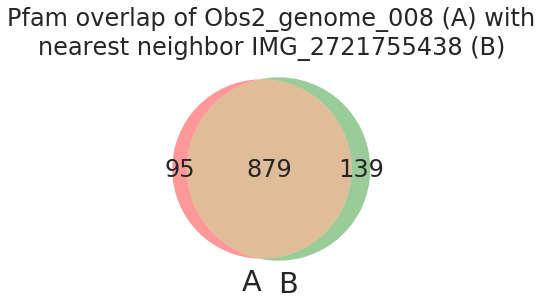

In [95]:
plus, minus = pfamVenn(foldernameNN.loc[0,'folder_name'])

In [68]:

len(set(list(pfamdf[refname].dropna(how='any'))))

1018

In [69]:
len(set(list(pfamdf[magname].dropna(how='any'))))

974

In [84]:
pfamdf.loc[1100:2300,:]
set(['A', 'B','B', 'C', 'D'])

{'A', 'B', 'C', 'D'}

In [77]:
len(pfamdf['Obs2_genome_008'].dropna(how='any').unique())

974

In [105]:
len(pfamdf['IMG_2721755438'].dropna(how='any').unique())
pd.read_csv(pfileMAG.values[0],'\t')

,gene_oid,gene_length,query_start,query_end,subj_start,subj_end,evalue,bit_score,pfam_id,pfam_name,pfam_length
0,2770265263,339,36,142,2,93,2.600000e-14,53.5,pfam00586,AIRS,94
1,2770265263,339,154,315,2,155,6.700000e-23,81.4,pfam02769,AIRS_C,156
2,2770265266,104,16,91,3,70,1.200000e-07,31.4,pfam01336,tRNA_anti-codon,76
3,2770265267,328,6,316,2,292,8.700000e-57,192.7,pfam00480,ROK,294
4,2770265268,364,19,362,2,346,0.000000e+00,445.7,pfam06068,TIP49,398
5,2770265269,83,1,37,364,397,2.200000e-06,26.7,pfam06068,TIP49,398
6,2770265270,213,16,102,2,86,6.800000e-08,32.7,pfam01895,PhoU,89
7,2770265270,213,120,201,1,83,1.800000e-13,50.6,pfam01895,PhoU,89
8,2770265271,254,22,179,3,137,1.500000e-29,103.1,pfam00005,ABC_tran,137
9,2770265272,279,83,275,1,176,4.200000e-20,72.1,pfam00528,BPD_transp_1,185


In [104]:
pd.read_csv(pfileMAG.values[0],'\t')
len(plus['pfam_id'].unique())
plus['pfam_name'].unique()

array(['PBP_like_2', 'MazE_antitoxin', 'RNA_POL_M_15KD', 'Nop10p',
       'CGI-121', 'A2L_zn_ribbon', 'SDH_sah', 'Fer4_4', 'BCA_ABC_TP_C',
       'Nitrate_red_del', 'Nitro_FeMo-Co', 'PaREP1', 'CobN-Mg_chel',
       'Asp_protease_2', 'Mg_chelatase', 'VWA_2', 'HTH_17',
       'CLP_protease', 'GPI', 'NPCBM_assoc', 'DUF217', 'DBI_PRT',
       'DUF1610', 'QRPTase_N', 'DFP', 'ADH_N', 'ADH_zinc_N', 'DUF1634',
       'gag-asp_proteas', 'ACP_syn_III', 'DUF2283', 'PEPCK_ATP', 'HTH_11',
       'Aldedh', 'zf-NADH-PPase', 'LMWPc', 'TOBE_2', 'Fer4_20',
       'Glu_synthase', 'HTH_12', 'DUF128', 'GATase_2', 'SUA5',
       'OrfB_IS605', 'Pilin_N', 'Flavodoxin_1', 'DUF973', 'DUF2276',
       'CARDB', 'Peptidase_S9', 'DUF2330', 'AcetylCoA_hydro',
       'AcetylCoA_hyd_C', 'Ribosomal_S5', 'PurS', 'AAA_15', 'CcdA',
       'Abhydrolase_6', 'DUF169', 'DsbD', 'GFO_IDH_MocA',
       'GFO_IDH_MocA_C', 'UDPG_MGDP_dh_N', 'UDPG_MGDP_dh',
       'UDPG_MGDP_dh_C', 'DUF354', 'Fe_dep_repress', 'Fe_dep_repr_C',
      

In [100]:
len(minus['pfam_id'].unique())

139

In [102]:
#minus[]
minus['pfam_name'].unique()

array(['DUF58', 'AAA_3', 'DUF1616', 'Lipase_2', 'Methyltransf_31',
       'Fer4_6', 'DsrH', 'Thioredoxin_3', 'ArsP_1', 'Esterase_phd',
       'URO-D', 'B12-binding_2', 'Fer2', 'DUF4445', 'Nuc_deoxyrib_tr',
       'DUF4430', 'Sugar_tr', 'PQQ_2', 'Thermopsin', 'Asparaginase_2',
       'HTH_45', 'Usp', 'MtrC', 'MtrD', 'MtrE', 'HTH_31', 'DUF2099',
       'PTA_PTB', 'UPF0047', 'DMT_YdcZ', 'Lycopene_cycl', 'GIDA',
       'Fer2_2', 'Ald_Xan_dh_C', 'Ald_Xan_dh_C2', 'FAD_binding_5',
       'CO_deh_flav_C', 'XdhC_CoxI', 'XdhC_C', 'Amidohydro_2',
       'PEP_mutase', 'Cupin_2', 'Rib_5-P_isom_A', 'NAD_binding_8',
       'Cytidylate_kin2', 'DUF2124', 'ADC', 'Band_7_1', 'DZR',
       'zinc_ribbon_2', 'Arrestin_N', 'YcaO', 'TfuA', 'MaoC_dehydrat_N',
       'MarR', 'tRNA-synt_1e', 'DUF89', 'RNA_Me_trans', 'DUF131',
       'HhH-GPD', 'EndIII_4Fe-2S', 'ApbE', 'HcyBio', 'NurA', 'MNHE',
       'MnhB', 'DUF4040', 'PhaG_MnhG_YufB', 'MrpF_PhaF', 'ZnuA', 'MobB',
       'Arc_PepC_II', 'CMD', 'AA_permease_2', '